In [282]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
City_Data_df = pd.read_csv(city_data)
Ride_Data_df = pd.read_csv(ride_data)


# Combine the data into a single dataset
City_Ride = Ride_Data_df.merge(City_Data_df, on='city')

## Display the data table for preview
City_Ride.count().head()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
dtype: int64

In [431]:
City_Group = City_Ride.groupby("city")
City_Group_Total = City_Group["driver_count"].sum()
City_Group_Total.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [270]:
# Obtain the x and y coordinates for each of the three city types
#Average Fare, Total Number of Rides(Per City)
City_Type = City_Ride.groupby(['type', "city"])
City_Type.count().head()

# Build the scatter plots for each city types


#plt.scatter(Total_Ride, Avg_Fare, s=City_Group, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
#plt.show()
# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


date  fare  ride_id  driver_count
type  city                                             
Rural Bradshawfurt      10    10       10            10
      Garzaport          3     3        3             3
      Harringtonfort     6     6        6             6
      Jessicaport        6     6        6             6
      Lake Jamie         6     6        6             6

In [111]:
Total_Fare = City_Type["fare"].sum()
City_Count = City_Type["city"].count()
Avg_Fare = Total_Fare / City_Count
Avg_Fare

type      city                
Rural     Bradshawfurt            40.064000
          Garzaport               24.123333
          Harringtonfort          33.470000
          Jessicaport             36.013333
          Lake Jamie              34.358333
          Lake Latoyabury         26.061818
          Michaelberg             34.997500
          New Ryantown            43.278333
          Newtonview              36.745000
          North Holly             29.130000
          North Jaime             30.802500
          Penaborough             35.246000
          Randallchester          29.742000
          South Jennifer          35.264286
          South Marychester       41.870000
          South Saramouth         36.160000
          Taylorhaven             42.263333
          West Heather            33.890000
Suburban  Barronchester           36.422500
          Bethanyland             32.956111
          Brandonfort             35.437368
          Colemanland             30.894545
 

In [429]:
Total_Ride = City_Type["ride_id"].count()
Total_Ride

type      city                
Rural     Bradshawfurt            10
          Garzaport                3
          Harringtonfort           6
          Jessicaport              6
          Lake Jamie               6
          Lake Latoyabury         11
          Michaelberg             12
          New Ryantown             6
          Newtonview               4
          North Holly              9
          North Jaime              8
          Penaborough              5
          Randallchester           5
          South Jennifer           7
          South Marychester        8
          South Saramouth          4
          Taylorhaven              6
          West Heather             9
Suburban  Barronchester           16
          Bethanyland             18
          Brandonfort             19
          Colemanland             22
          Davidfurt               17
          East Aaronbury           9
          East Danielview         17
          East Kentstad           13
       

In [407]:
Type = City_Data_df.groupby(['type'])
Driver_Count = Type["driver_count"].sum().head()
sum(Driver_Count)

2973

In [436]:
Driver_Count["Rural"]

78

In [398]:
City = City_Data_df.groupby(["city", "type"])
Driver_Count_City = City["driver_count"].sum()
Driver_Count_City
# Driver_Count = City_Type["driver_count"].count()
# Driver_Count.sum()

city                  type    
Amandaburgh           Urban       12
Barajasview           Urban       26
Barronchester         Suburban    11
Bethanyland           Suburban    22
Bradshawfurt          Rural        7
Brandonfort           Suburban    10
Carriemouth           Urban       52
Christopherfurt       Urban       41
Colemanland           Suburban    23
Davidfurt             Suburban    23
Deanville             Urban       49
East Aaronbury        Suburban     7
East Danielview       Suburban    22
East Kaylahaven       Urban       65
East Kentstad         Suburban    20
East Marymouth        Suburban     5
Erikaland             Urban       37
Garzaport             Rural        7
Grahamburgh           Urban       61
Grayville             Suburban     2
Harringtonfort        Rural        4
Huntermouth           Urban       37
Hurleymouth           Urban       36
Jerryton              Urban       64
Jessicaport           Rural        1
Johnton               Urban       27
Jonesch

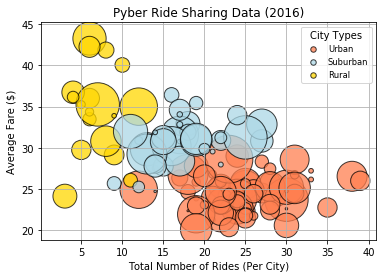

In [426]:

#fig, ax = plt.subplots()
Urban_Scatter = plt.scatter(Total_Ride["Urban"], Avg_Fare["Urban"], s=City_Group_Total, c="coral", label="Urban", marker="o", edgecolors="black", alpha=0.75)
Rural_Scatter = plt.scatter(Total_Ride["Rural"], Avg_Fare["Rural"], s=City_Group_Total, c="gold", label="Rural", marker="o", edgecolors="black", alpha=0.75)
Suburban_Scatter = plt.scatter(Total_Ride["Suburban"], Avg_Fare["Suburban"], s=City_Group_Total, c="lightblue", label="Suburban", marker="o", edgecolors="black", alpha=0.75)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


#plt.ylabel('Note: Circles size correlates with driver count per city',rotation=0, ha='right', set_lable_position = "right")
#ax.yaxis.set_label_position("right")
legend = plt.legend(title="City Types", handles=[Urban, Suburban, Rural], fontsize="small", loc="upper right")
plt.grid()
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

##TEXT BOX
#fig.text(1, .5, "Note: Circles size correlates with driver count per city", rotation=0, ha='right')
        
#fig.tight_layout()

plt.show()

In [165]:
# Show plot
plt.show()

## Total Fares by City Type

In [332]:
# Calculate Type Percents
Total_Rural_Rides = sum(Total_Ride["Rural"])
Total_Sum_Rides = sum(Total_Ride)
Rural_Percent_Fares = Total_Rural_Fares / Total_Sum_Fares * 100

Total_Urban_Fares = sum(Total_Fare["Urban"])
Urban_Percent_Fares = Total_Urban_Fares / Total_Sum_Fares * 100

Total_Suburban_Fares = sum(Total_Fare["Suburban"])
Suburban_Percent_Fares = Total_Suburban_Fares / Total_Sum_Fares * 100

# Build Pie Chart

# Save Figure


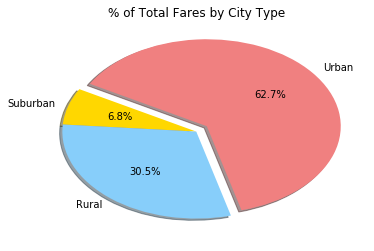

In [425]:
labels = ["Urban", "Suburban", "Rural"]

sizes = [Urban_Percent_Fares, Rural_Percent_Fares, Suburban_Percent_Fares]

colors = "lightcoral", "gold", "lightskyblue"

explode = (.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, 
        autopct="%1.1f%%", startangle=-75, shadow=True, explode=explode)
plt.title("% of Total Fares by City Type")

plt.show()

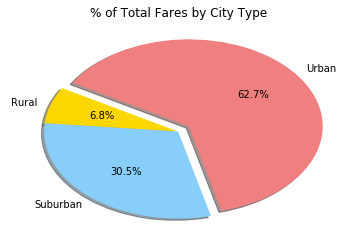

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [366]:
# Calculate Ride Percents
Total_Rural_Rides = sum(Total_Ride["Rural"])
Total_Sum_Rides = sum(Total_Ride)
Rural_Percent_Rides = Total_Rural_Rides / Total_Sum_Rides * 100

Total_Suburban_Rides = sum(Total_Ride["Suburban"])
Suburban_Percent_Rides = Total_Suburban_Rides / Total_Sum_Rides * 100

Total_Urban_Rides = sum(Total_Ride["Urban"])
Urban_Percent_Rides = Total_Urban_Rides / Total_Sum_Rides * 100

Total_Sum_Rides

# Build Pie Chart

# Save Figure


2375

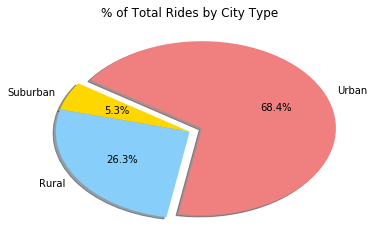

In [424]:
labels = ["Urban", "Suburban", "Rural"]
colors = "lightcoral", "gold", "lightskyblue"
explode = (.1, 0, 0)
sizes = [Urban_Percent_Rides, Rural_Percent_Rides, Suburban_Percent_Rides]

plt.pie(sizes, labels=labels, colors=colors, 
        autopct="%1.1f%%", startangle=-100, shadow=True, explode=explode)
plt.title("% of Total Rides by City Type")
plt.show()

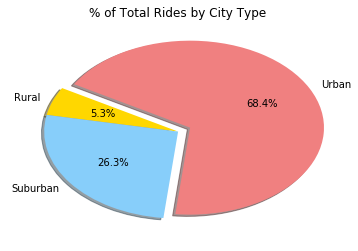

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [411]:
# Calculate Driver Percents
Rural_Percent_Drivers = Driver_Count["Rural"] / sum(Driver_Count) * 100
Suburban_Percent_Drivers = Driver_Count["Suburban"] / sum(Driver_Count) * 100
Urban_Percent_Drivers = Driver_Count["Urban"] / sum(Driver_Count) * 100

# # Build Pie Charts

# Save Figure


16.481668348469558

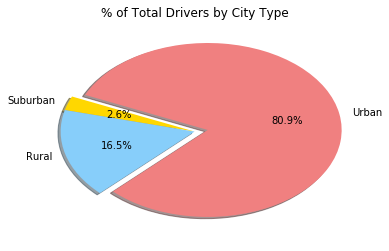

In [422]:
labels = ["Urban", "Suburban", "Rural"]
colors = "lightcoral", "gold", "lightskyblue"
explode = (.1, 0, 0)
sizes = [Urban_Percent_Drivers, Rural_Percent_Drivers, Suburban_Percent_Drivers]

plt.pie(sizes, labels=labels, colors=colors, 
        autopct="%1.1f%%", startangle=-135, shadow=True, explode=explode)
plt.title("% of Total Drivers by City Type")
plt.show()

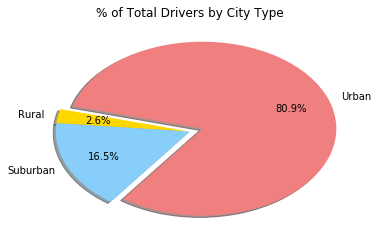

In [6]:
# Show Figure
plt.show()